# Linear Regression, KNN Regressor, XGBoost

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
df = pd.read_excel('../data/freshwater_datamaster.xlsx', sheet_name='main')
df = df[['DISTANCE', 'FRESH_WATER']]

In [47]:
X = df[['DISTANCE']]
y = df['FRESH_WATER']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [49]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression Mean Squared Error: {mse_lr}')

Linear Regression Mean Squared Error: 68830360.44662255


### KNN Regressor

In [50]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f'KNN Regression Mean Squared Error: {mse_knn}')

KNN Regression Mean Squared Error: 80095555.55555555


### XGBoost

In [51]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Regression Mean Squared Error: {mse_xgb}')

XGBoost Regression Mean Squared Error: 69112106.49950044


### Neural Network

In [52]:
def create_nn_model():
    model = Sequential()
    model.add(Dense(32, input_dim=1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

nn_model = create_nn_model()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping], verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')

c:\Users\Afifudin\anaconda3\envs\spil-HRIS\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Neural Network Mean Squared Error: 330879803.8977244


### Test

In [53]:
new_distance = [[463]]  # Replace 15 with your distance value
new_distance_scaled = scaler.transform(new_distance)


c:\Users\Afifudin\anaconda3\envs\spil-HRIS\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
predicted_freshwater_needs_lr = lr_model.predict(new_distance_scaled)
print(f'Predicted Freshwater Needs (Linear Regression): {predicted_freshwater_needs_lr[0]}')

predicted_freshwater_needs_knn = knn_model.predict(new_distance_scaled)
print(f'Predicted Freshwater Needs (KNN Regression): {predicted_freshwater_needs_knn[0]}')

predicted_freshwater_needs_xgb = xgb_model.predict(new_distance_scaled)
print(f'Predicted Freshwater Needs (XGBoost Regression): {predicted_freshwater_needs_xgb[0]}')

predicted_freshwater_needs_nn = nn_model.predict(new_distance_scaled)
print(f'Predicted Freshwater Needs (NN Regression): {predicted_freshwater_needs_nn[0]}')


Predicted Freshwater Needs (Linear Regression): 13775.330416703546
Predicted Freshwater Needs (KNN Regression): 15600.0
Predicted Freshwater Needs (XGBoost Regression): 16999.8515625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Freshwater Needs (NN Regression): [228.77136]


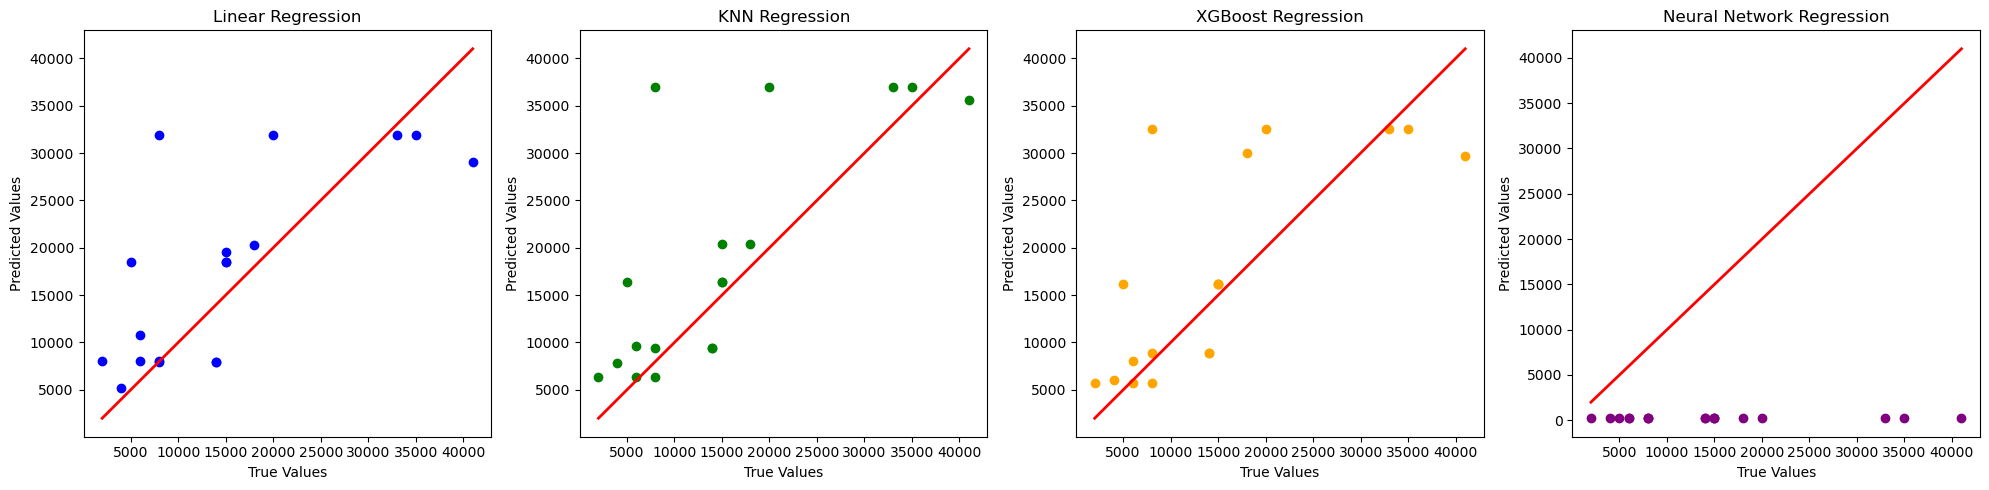

In [55]:
plt.figure(figsize=(20, 5))

# Linear Regression Chart
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')

# KNN Regression Chart
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_knn, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression')

# XGBoost Regression Chart
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_xgb, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression')

# Neural Network Regression Chart
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_nn, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Regression')

plt.tight_layout()
plt.show()

In [57]:
import joblib
joblib.dump(lr_model, '../models/model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

['../models/scaler.pkl']